# NSL-KDD data analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn.preprocessing import normalize

### Data Handling
#### Let's read our data in using pandas:

In [2]:
df = pd.read_csv("data/all/KDDTrain_new.csv") 

Show an overview of our data:

In [3]:
#df

### Let's take a Look at our data graphically:
Plot with Seaborn

## Category Distrubtion

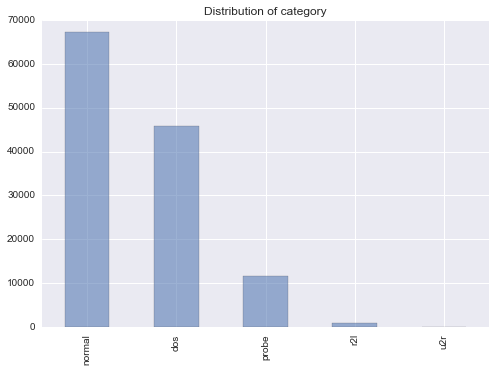

In [4]:
# plots a bar graph of the attack category.
alpha_bar_chart = 0.55
df['class'].value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# puts a title on our graph
plt.title("Distribution of category")  

In [5]:
# change catergory data to integers, because some seaborn function only accept integer input.
for attribute in ["protocol_type","service","flag"]:
    le_attribute = preprocessing.LabelEncoder()   
    df[attribute] = le_attribute.fit_transform(df[attribute])

## PairPlots
See how variables vary with one another.
We can see which features have good discrimitive ablities. 
We can also see that features distrbution different in different attack. 

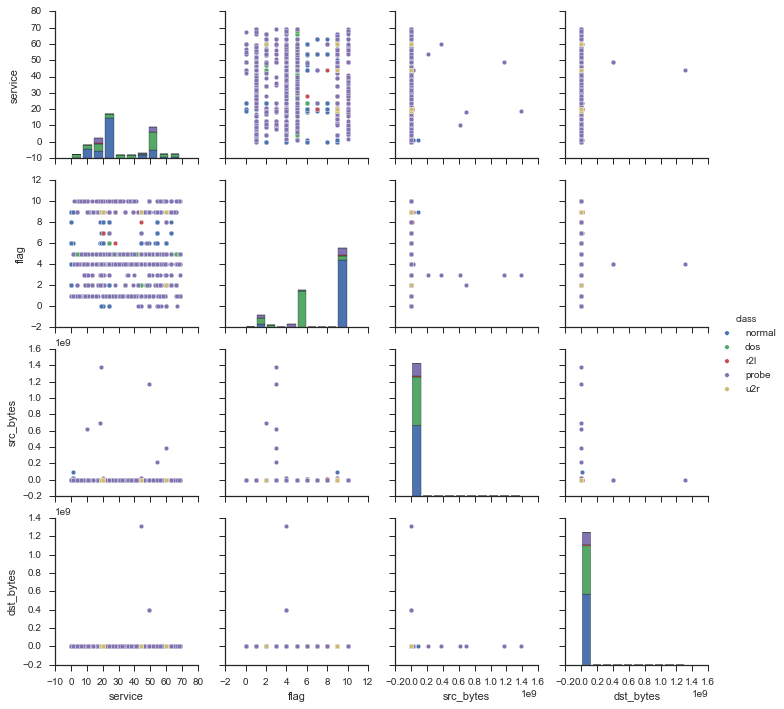

In [6]:
#Plot a scatter graph of pair feature distrubtion
sns.set(style="ticks", color_codes=True)
# Create a Pairplot
pairlot1 = sns.pairplot(df[:], vars=["service", "flag", "src_bytes","dst_bytes"], 
                        hue="class", size=2.5)
pairlot1.savefig("graph/pairlot1.png")

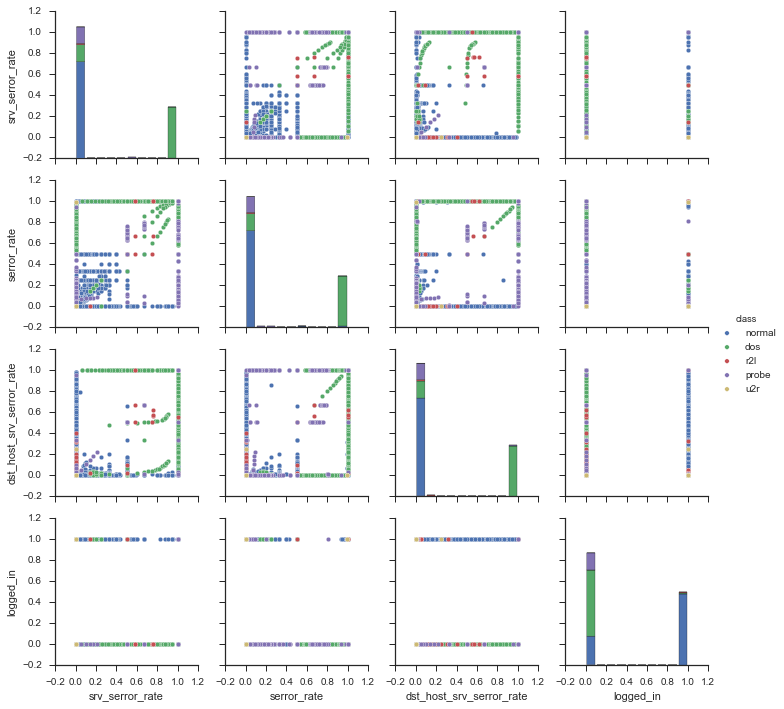

In [7]:
plt.figure(figsize=(10,8))
pairlot2 = sns.pairplot(df[:], vars=["srv_serror_rate", "serror_rate", "dst_host_srv_serror_rate",
                                     "logged_in"], hue="class")
pairlot2.savefig("graph/pairlot2.png")
plt.show()

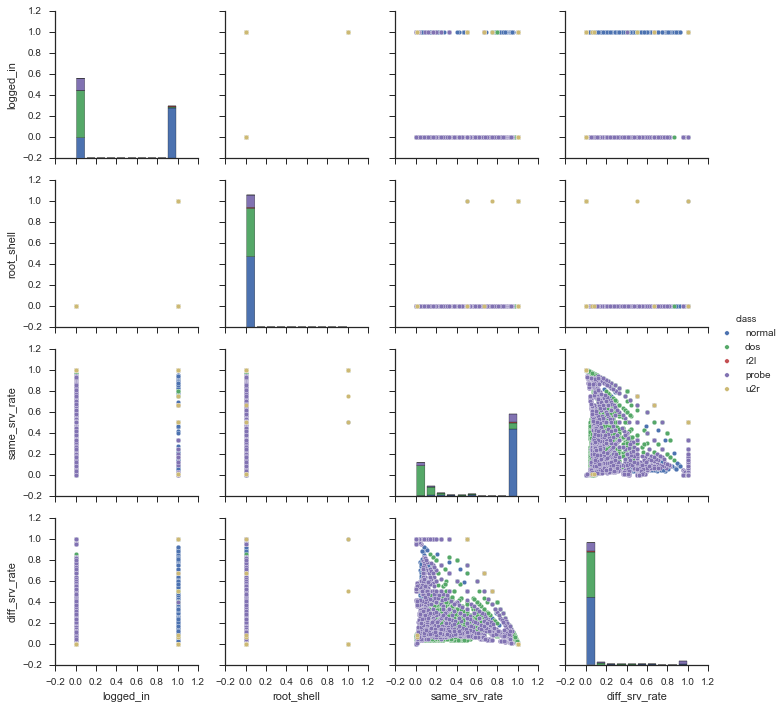

In [8]:
pairlot3 = sns.pairplot(df[:], vars=["logged_in", "root_shell", "same_srv_rate",
                                     "diff_srv_rate"], hue="class", size=2.5)
pairlot3.savefig("graph/pairlot3.png")

## Correlation between features

C:\Users\jzhao1\AppData\Local\Continuum\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\jzhao1\AppData\Local\Continuum\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


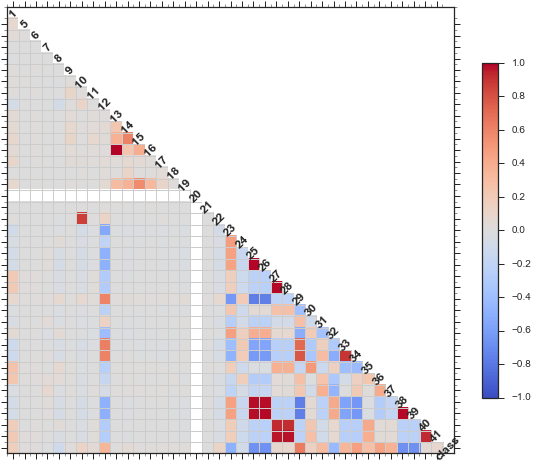

In [9]:
dff = pd.read_csv("data/all/KDDTrain_new_indexFeature.csv")
le_class = preprocessing.LabelEncoder()
dff['class']=le_class.fit_transform(dff['42'])
plt.figure(figsize=(10,8))
corrplot = sns.corrplot(dff, annot=False)
plt.show()

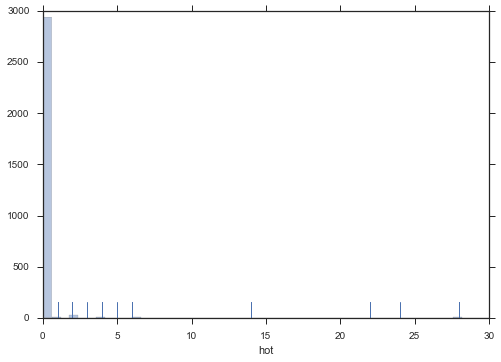

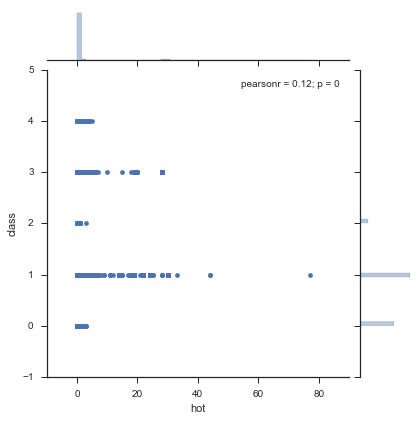

In [10]:
le_class = preprocessing.LabelEncoder()
df['class'] = le_class.fit_transform(df['class'])
sns.distplot(df[0:3000].hot, kde=False, rug=True);
g = sns.jointplot(x="hot", y="class", data=df)